# Customer Churn Analysis
# 


- GOAL: Create a model to predict whether or not a customer will Churn .
- Focus: Tree Methods (Single Decision tree, Random Forest, AdaBoost, Gradient Boosting)


## Preprocessing 

**Imports and Read in the Data**

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Check if Null Values exists in dataframe**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Statistical summary**

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Exploratory Data Analysis


**Feature Exploration**

In [6]:
# No null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Balance of the class labels (Churn) with a Count Plot.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

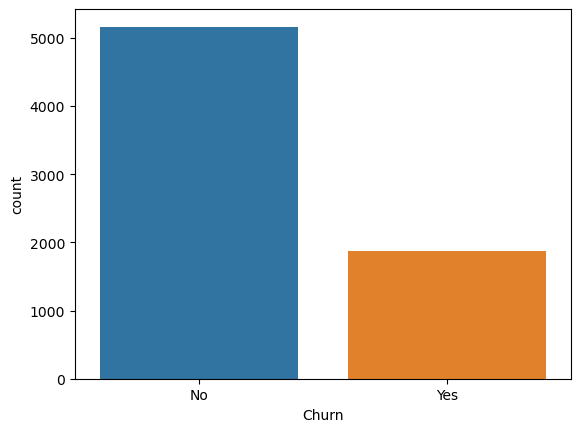

In [7]:
# countplot
sns.countplot(df, x='Churn')

**Distrbution of TotalCharges between Churn categories with a Violin Plot.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

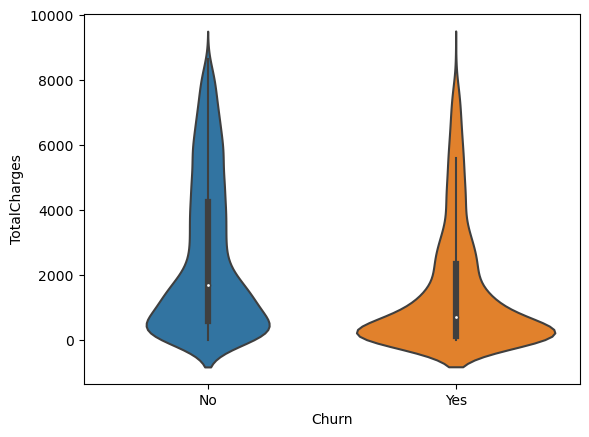

In [8]:
# violinplot
sns.violinplot(df, x='Churn', y='TotalCharges')

**Boxplot showing the distribution of TotalCharges per Contract type**

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

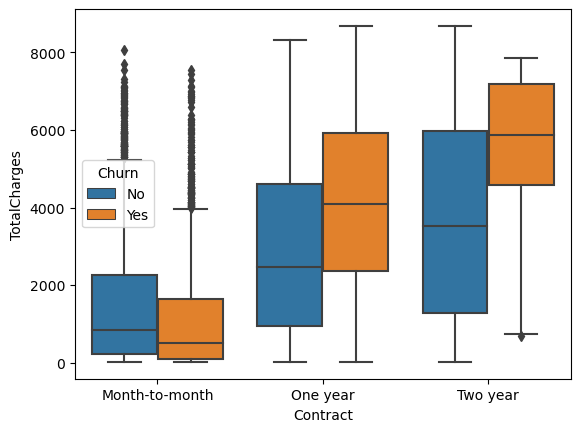

In [9]:
#boxplot
sns.boxplot(df, x='Contract', y='TotalCharges', hue='Churn')

**Bar plot showing the correlation of the following features to the target label.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [10]:
#list features
c_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
           'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
#Create partial df
df_sm = df.filter(c_list, axis=1)
df_sm['Churn'] = df['Churn']
#Binarize categorical variables
df_sm = pd.get_dummies(df_sm)
#calculate correlation
df_corr = df_sm.corr()['Churn_Yes'].sort_values().iloc[1:-1]
df_corr

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

Text(0.5, 1.0, 'Feature Correlation to Churn Yes')

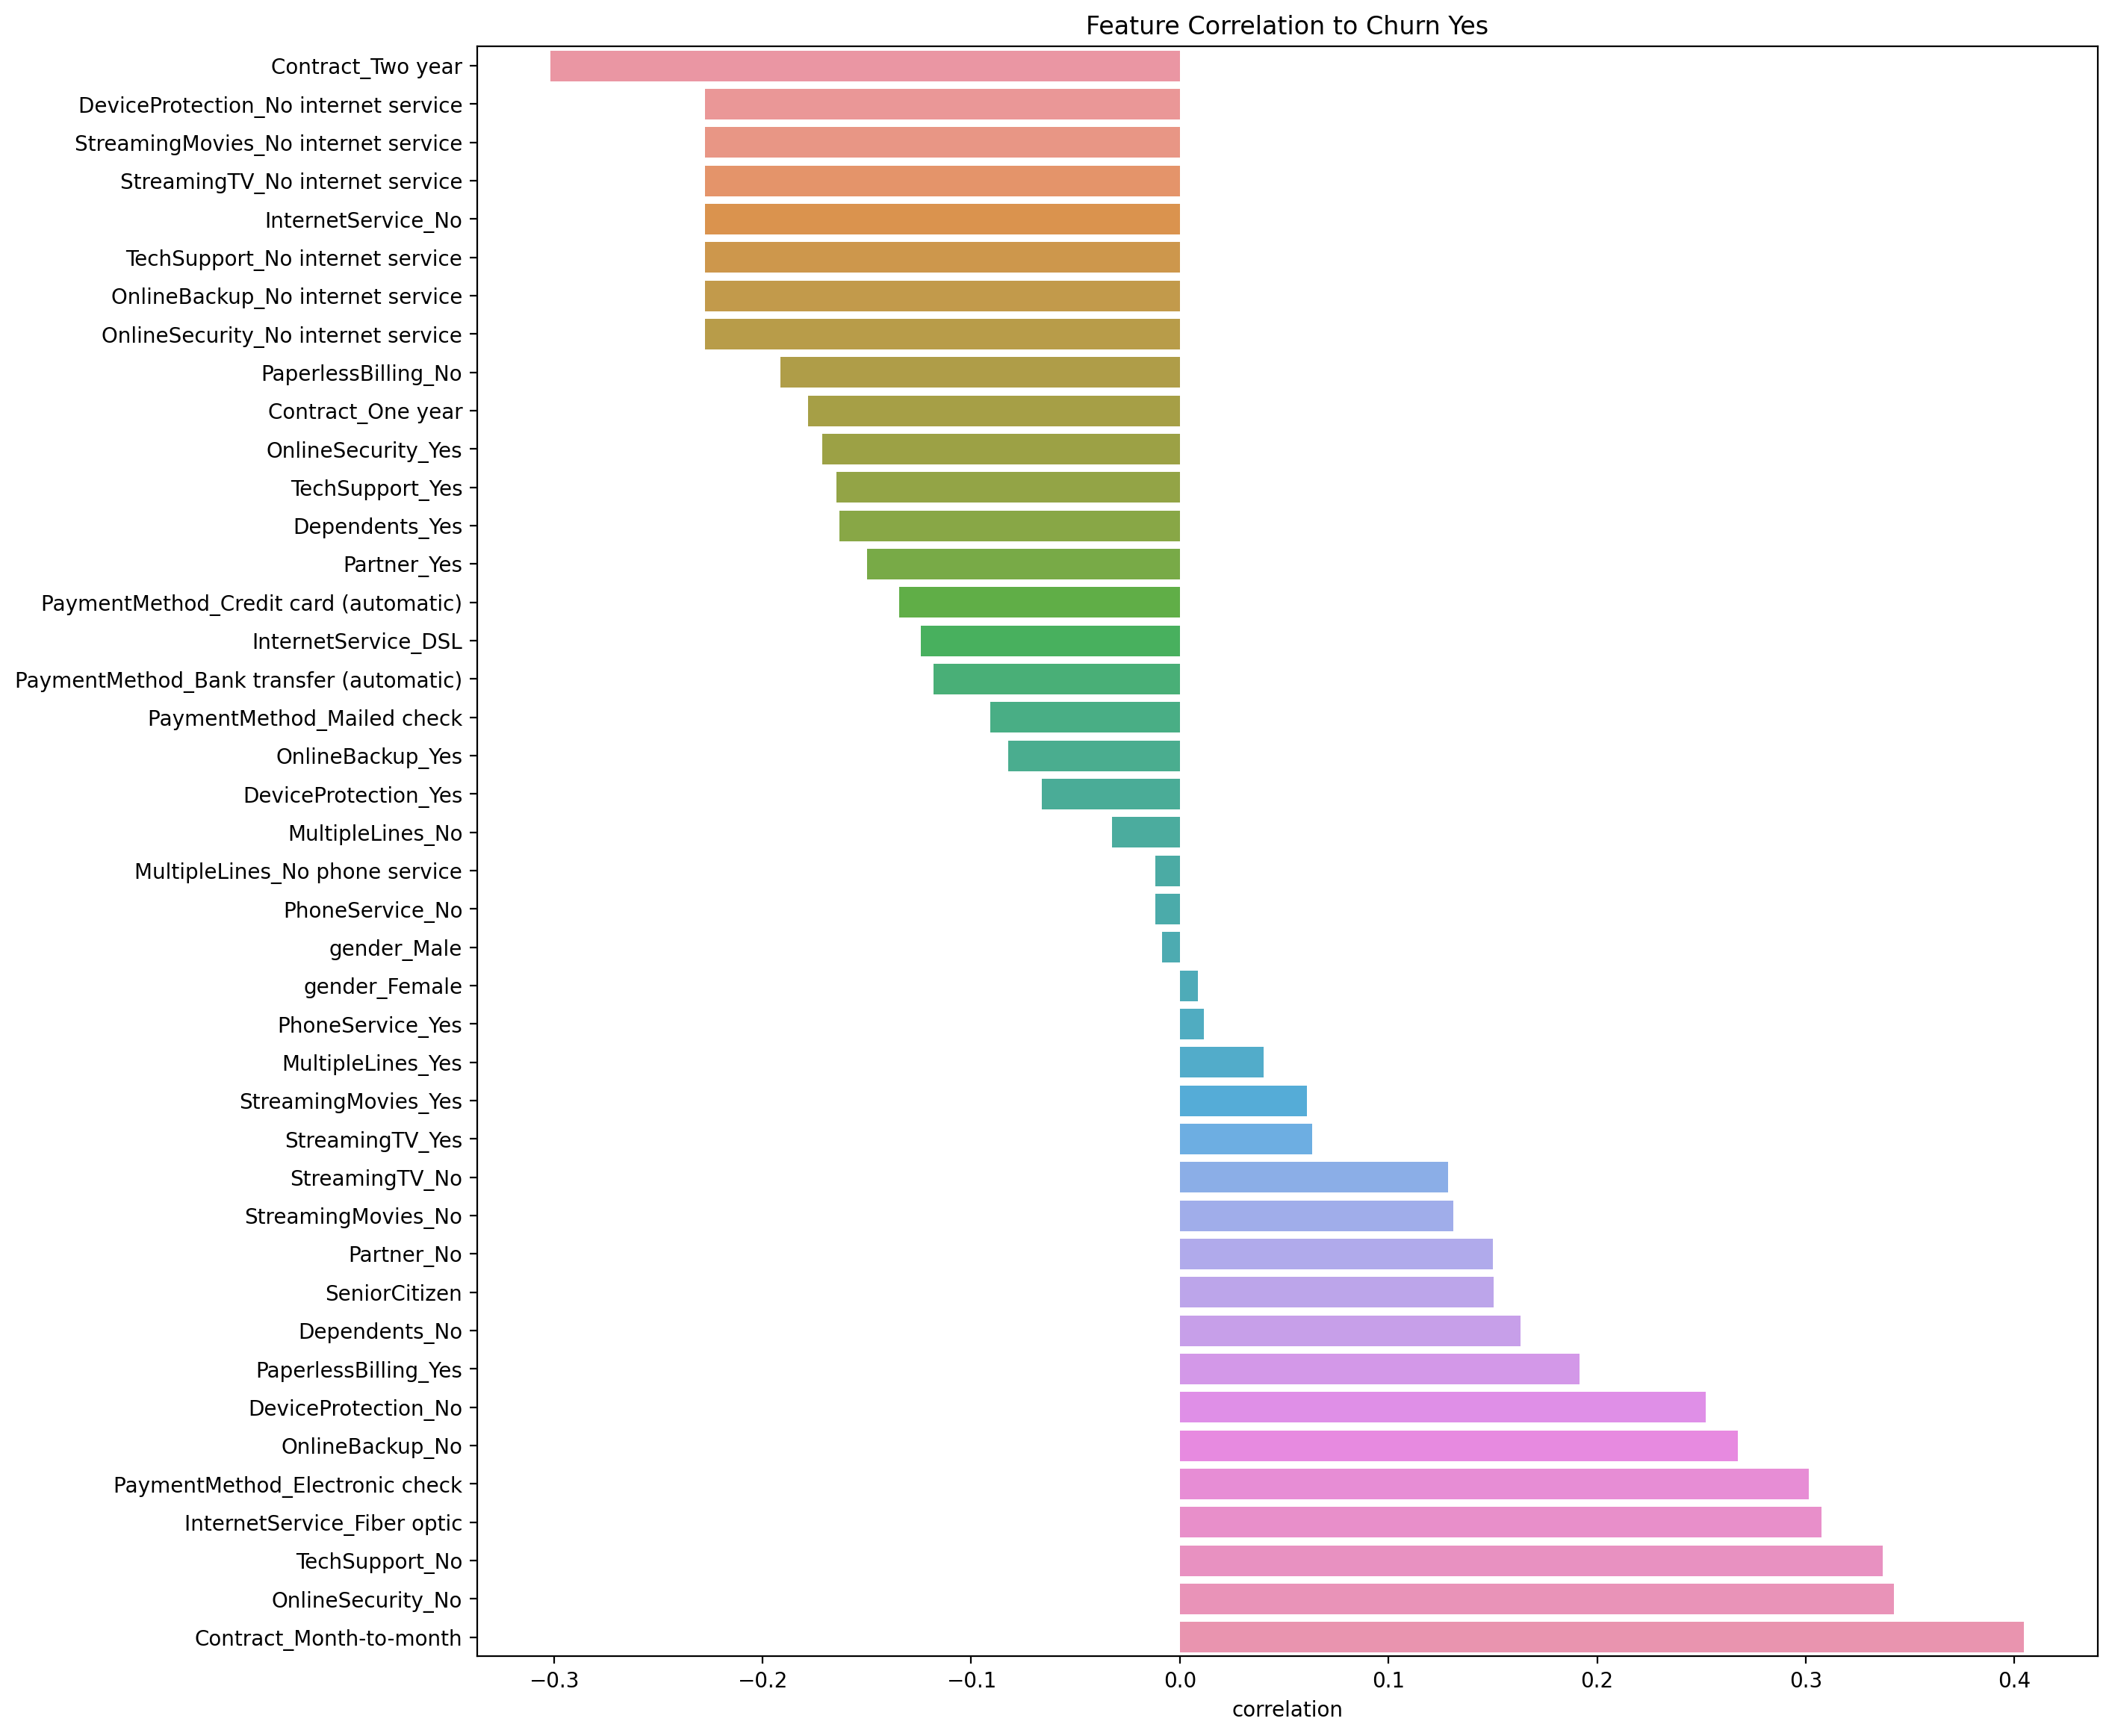

In [11]:
#Plot correlation variables
plt.figure(figsize=(14,14),dpi=200)
sns.barplot(x=df_corr.values, y=df_corr.index)
plt.xlabel('correlation')
plt.title('Feature Correlation to Churn Yes')


### Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**3 contract types available**

In [12]:
# contract types
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

**Histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been a customer.**

Text(0.5, 1.0, 'Histogram of Tenure Accounts')

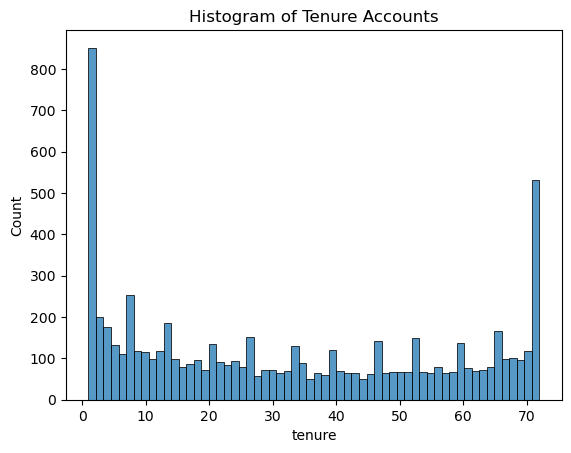

In [13]:
#histplot
sns.histplot(df, x='tenure', bins=60)
plt.title('Histogram of Tenure Accounts')

**Churn vs Contract**

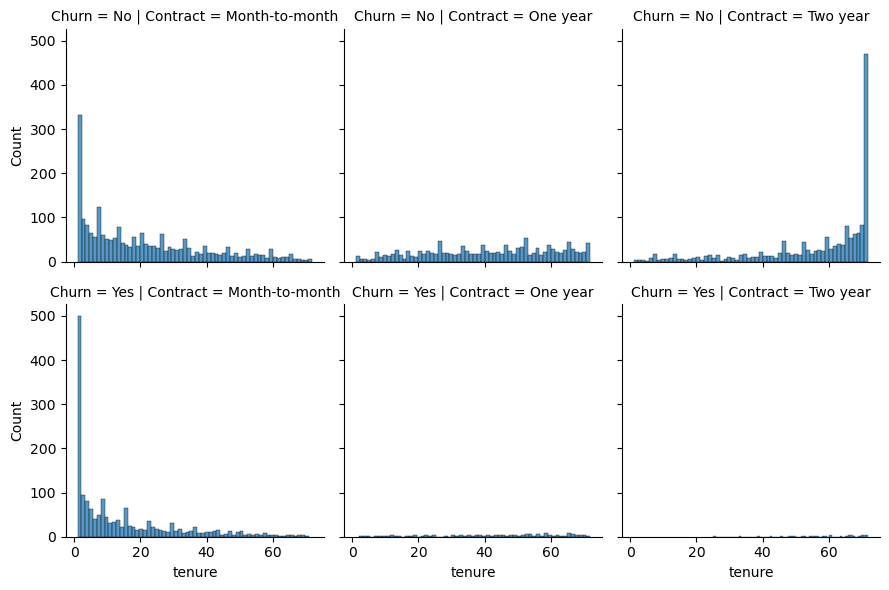

In [14]:
#FacetGrid
g = sns.FacetGrid(df, col="Contract",  row="Churn")
g.map(sns.histplot, "tenure", bins=60)

**Scatter plot of Total Charges versus Monthly Charges**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

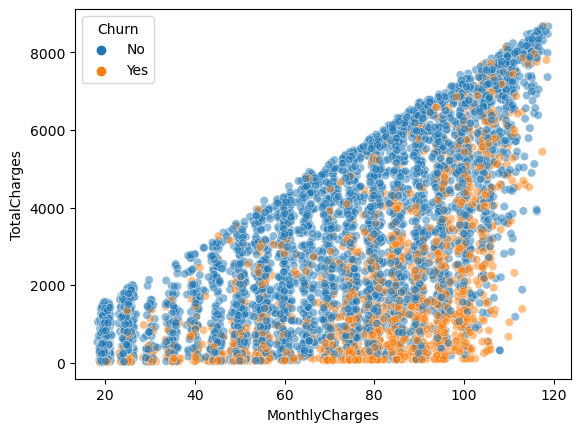

In [15]:
#scatterplot
sns.scatterplot(df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.5)

**Churn rate per cohort. Each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**


In [16]:
df['Churn_bin'] = df['Churn'].map({'Yes':1,'No':0})
churn_rate = 100*df.groupby('tenure')['Churn_bin'].sum()/df.groupby('tenure')['Churn_bin'].count()
churn_rate

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Churn_bin, Length: 72, dtype: float64

**Churn rate per months of tenure.**

Text(0.5, 1.0, 'Churn Percentage per Tenure')

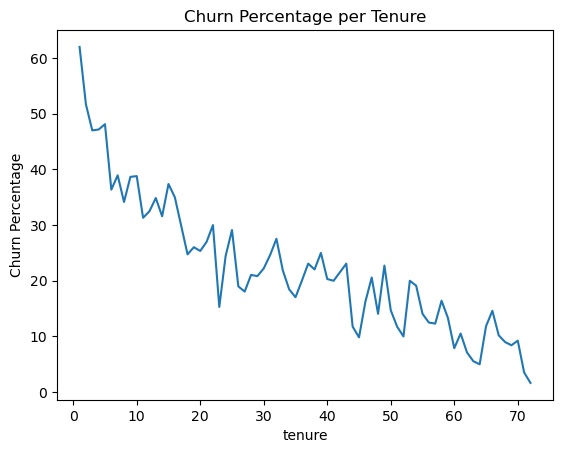

In [17]:
#lineplot
sns.lineplot(x=churn_rate.index, y=churn_rate.values)
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage per Tenure')

**Group cohorts into 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [18]:
# function
def ten_grp(row):
    if row <= 12:
        group = '0-12 Months'
    elif row <= 24:
        group = '12-24 Months'
    elif row <= 48:
        group = '24-48 Months'
    else:
        group = 'Over 48 Months'
    return group

df['ten_coh'] = df['tenure'].apply(ten_grp)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_bin,ten_coh
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0-12 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,12-24 Months
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,Over 48 Months
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,0-12 Months
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1,0-12 Months


**Total Charges versus Monthly Charges**

Text(0.5, 1.0, 'Total Charges versus Monthly Charts')

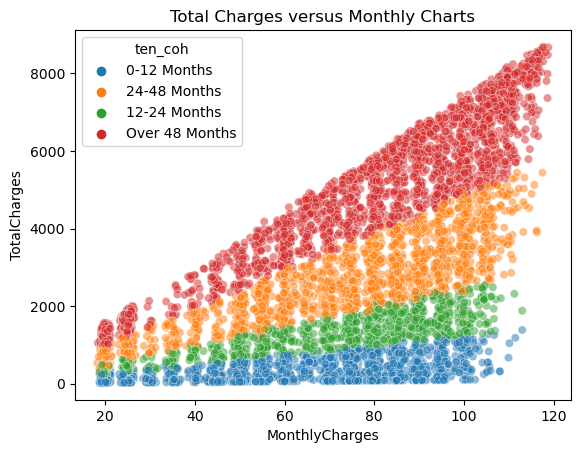

In [19]:
#scatterplot
sns.scatterplot(df, x='MonthlyCharges', y='TotalCharges', hue='ten_coh', alpha=0.5)
plt.title('Total Charges versus Monthly Charts')

**Churn count per cohort**

Text(0.5, 1.0, 'Churn count per cohort')

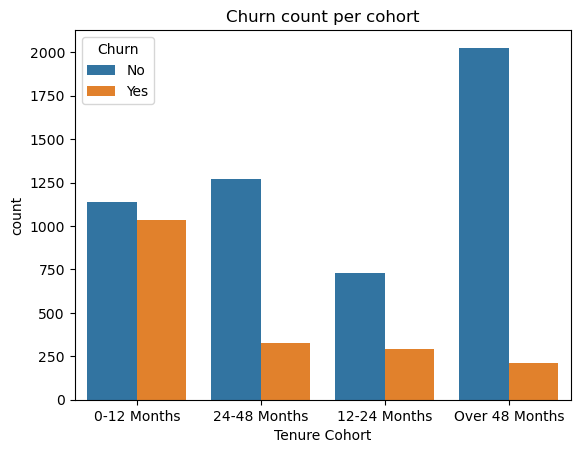

In [20]:
# Churn count per cohort
sns.countplot(df, x='ten_coh', hue='Churn')
plt.xlabel('Tenure Cohort')
plt.title('Churn count per cohort')

**Churn count by contract type per tenure cohort**

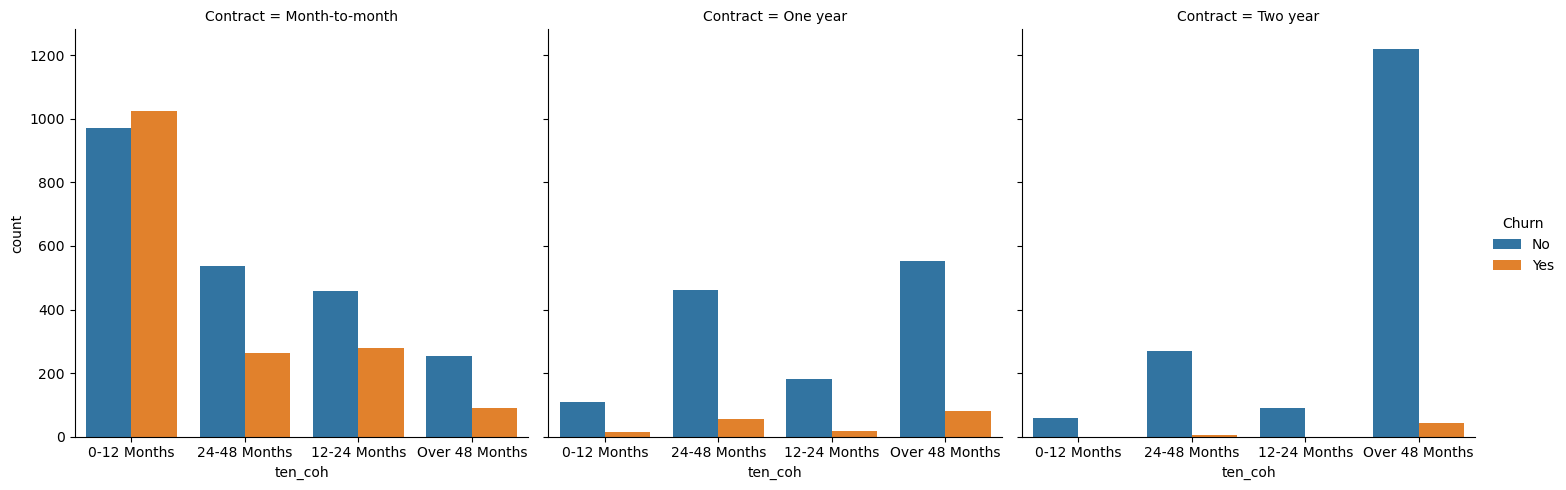

In [21]:
#CODE HERE
sns.catplot(df, x='ten_coh', hue='Churn', kind='count', col='Contract')


## Predictive Modeling

- We'll explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.
- We'll find the best parameters for each model through gridsearch.


In [22]:
#Removed unnecessary columns
not_useful = ['customerID', 'Churn_bin', 'ten_coh']
df = df.drop(not_useful, axis=1)

X = df.drop('Churn', axis=1)
y = df['Churn']

#Create dummies for categorical variables
X = pd.get_dummies(X, drop_first=True)

#Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Single Decision Tree

- We'll create a function called "report_model" that we can reuse to perform grid search, fit the model, and generate reports for all subsequent models. 


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

def report_model(model, param_grid):
    #fit grid search with model and parameters
    model_grid = GridSearchCV(model, param_grid)
    model_grid.fit(X_train, y_train)
    
    #calculate y_preds
    y_preds = model_grid.predict(X_test)
    
    #Feature importance
    feat_importance = pd.DataFrame(data=model_grid.best_estimator_.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).\
                        sort_values('importance',ascending=False) 
    feat_importance = feat_importance[feat_importance['importance'] >0]
    feat_plot = sns.barplot(feat_importance, y=feat_importance.index, x='importance')
    plt.title('Featue Importance')
    plt.show()
    
    #Plot tree
    if (str(model_grid.estimator) == 'DecisionTreeClassifier()'):
        plt.figure(figsize=(13,9),dpi=200)
        plt.title('Decision Tree')
        plot_tree(model_grid.best_estimator_,filled=True,feature_names=X.columns);
    
    #generate reports
    print('-Best Estimator:\n', model_grid.best_estimator_, '\n')
    print('-Best Params:\n', model_grid.best_params_, '\n')
    print('-Classification Report:\n', classification_report(y_test,y_preds))
    disp = ConfusionMatrixDisplay.from_predictions(y_test,y_preds)
    plt.title('Confusion Matrix')
    plt.show()

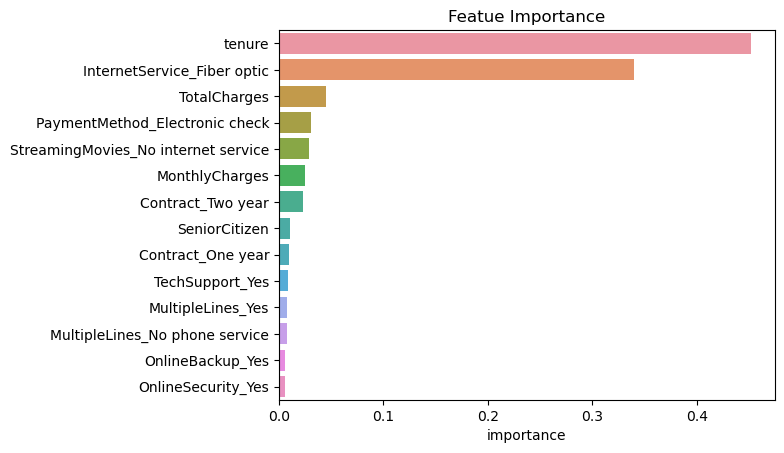

-Best Estimator:
 DecisionTreeClassifier(max_depth=5) 

-Best Params:
 {'max_depth': 5} 

-Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



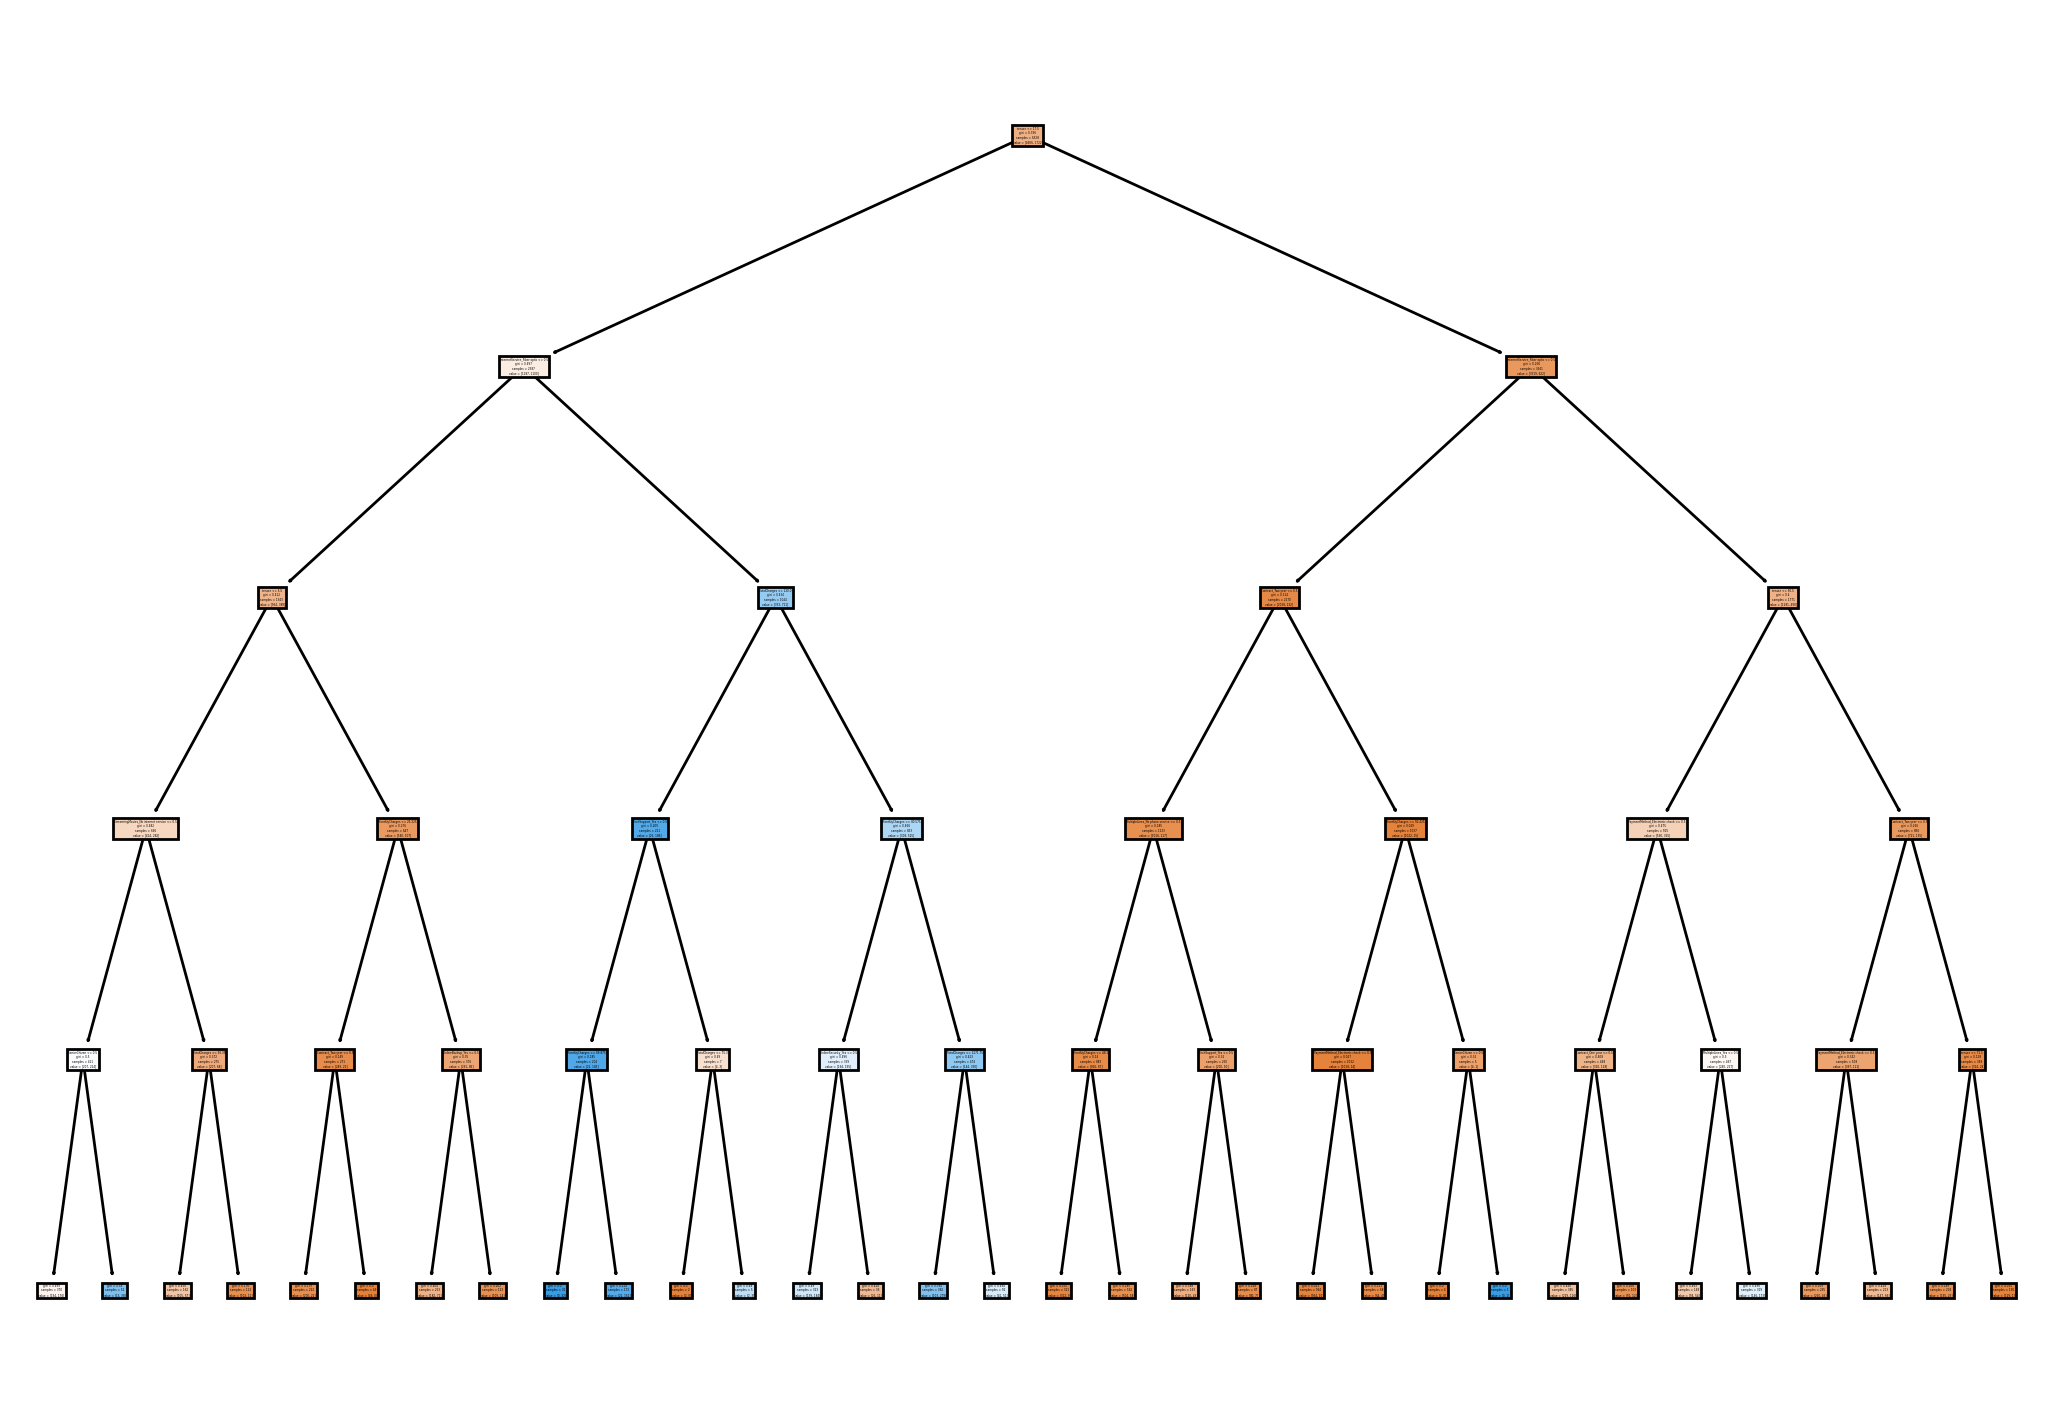

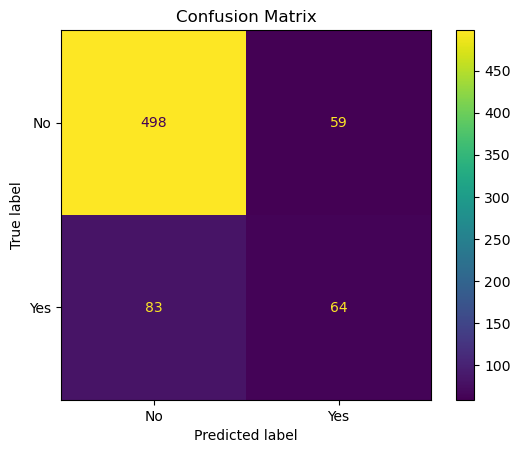

In [24]:
#Single decision tree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
param_grid = {'max_depth' : [3,5,10]}

report_model(tree_model, param_grid)


### Random Forest


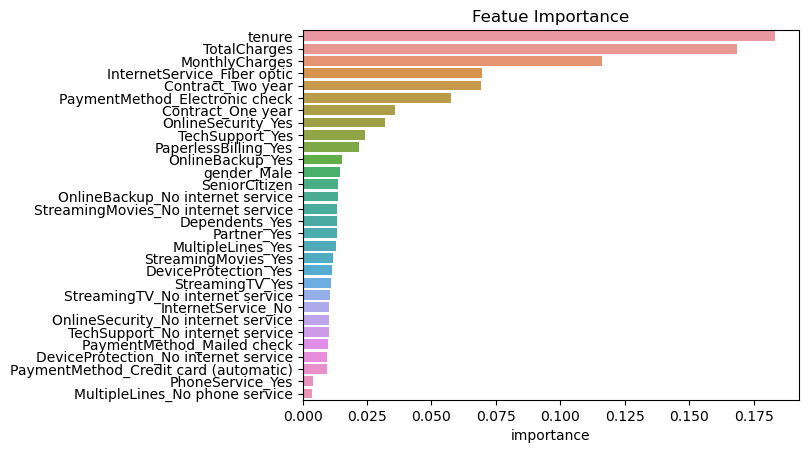

-Best Estimator:
 RandomForestClassifier(max_depth=10, n_estimators=150) 

-Best Params:
 {'max_depth': 10, 'n_estimators': 150} 

-Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.59      0.47      0.52       147

    accuracy                           0.82       704
   macro avg       0.73      0.69      0.71       704
weighted avg       0.81      0.82      0.81       704



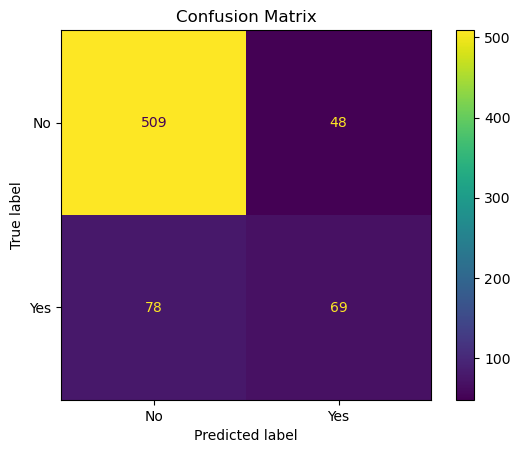

In [25]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
param_grid = {'n_estimators' : [70,100,150],
              'max_depth' : [3,5,10]}

report_model(rf_model, param_grid)

### Boosted Trees

**AdaBoost**

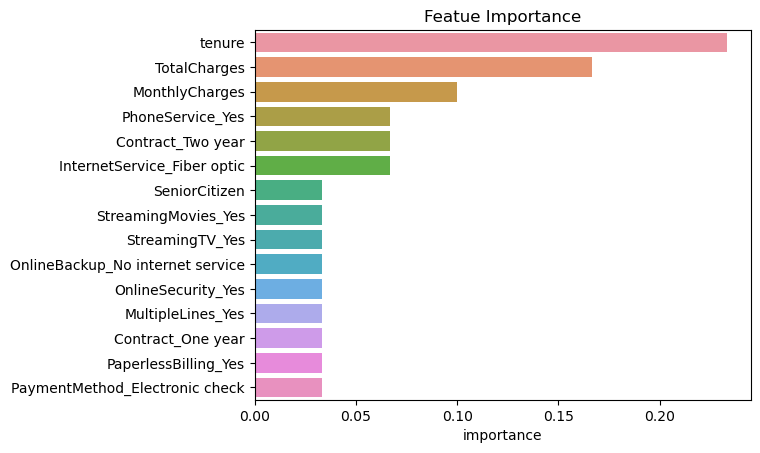

-Best Estimator:
 AdaBoostClassifier(n_estimators=30) 

-Best Params:
 {'n_estimators': 30} 

-Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.61      0.52      0.56       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.73       704
weighted avg       0.82      0.83      0.82       704



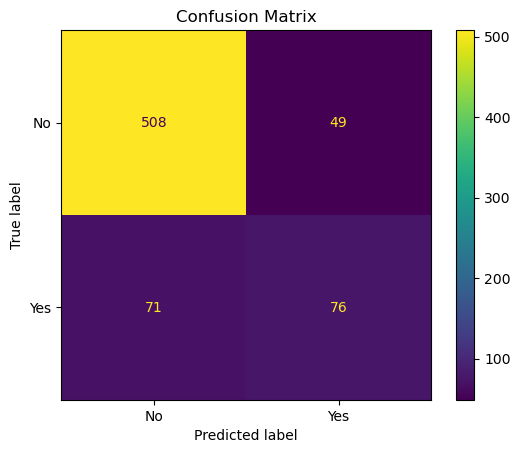

In [26]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
param_grid = {'n_estimators' : [30,50,70,100]}

report_model(ada_model, param_grid)

**GradientBoosting**

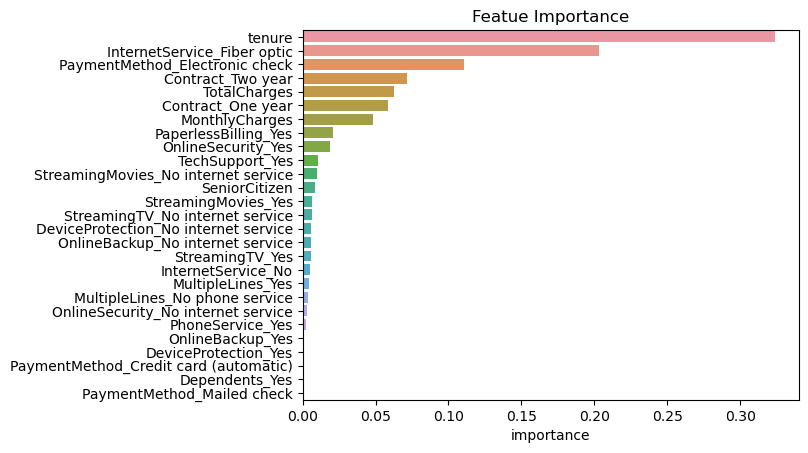

-Best Estimator:
 GradientBoostingClassifier(n_estimators=70) 

-Best Params:
 {'max_depth': 3, 'n_estimators': 70} 

-Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.60      0.50      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



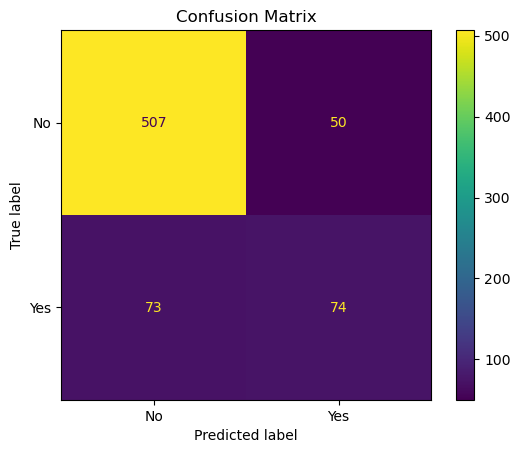

In [27]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier()
param_grid = {'n_estimators' : [50,70,100,120,150],
              'max_depth' : [3,5,10]}

report_model(gbc_model, param_grid)

## Conclusion

- By identifying which customers will Churn, we can issue promotions and special offers that will entice those customers to stay. 
- We got the best performance from the AdaBoostClassifier, but note that most models performed about the same on the data set.
- The best model (AdaBoost) predicted 71 customers would not Churn when, in reality, they did. 
- Adaboost was the simplest model with only 15 important features.
- Accuracy for all the models was between 0.80 to 0.83, depending on the model.

